Dataset Loaded Successfully!

First 5 Rows:

  CustomerID  Age  Gender  Annual_Income_k  Spending_Score  Recency  \
0       C001   23    Male               25              81        5   
1       C002   45  Female               62              35       40   
2       C003   34  Female               45              65       12   
3       C004   29    Male               33              72        7   
4       C005   41    Male               78              20       60   

   Frequency  Monetary_Value  
0         20            1500  
1          8             900  
2         15            2100  
3         18            1750  
4          5             650  

Dataset Shape: (15, 8)

Columns: Index(['CustomerID', 'Age', 'Gender', 'Annual_Income_k', 'Spending_Score',
       'Recency', 'Frequency', 'Monetary_Value'],
      dtype='object')

Missing Values:

CustomerID         0
Age                0
Gender             0
Annual_Income_k    0
Spending_Score     0
Recency            0
Frequency        

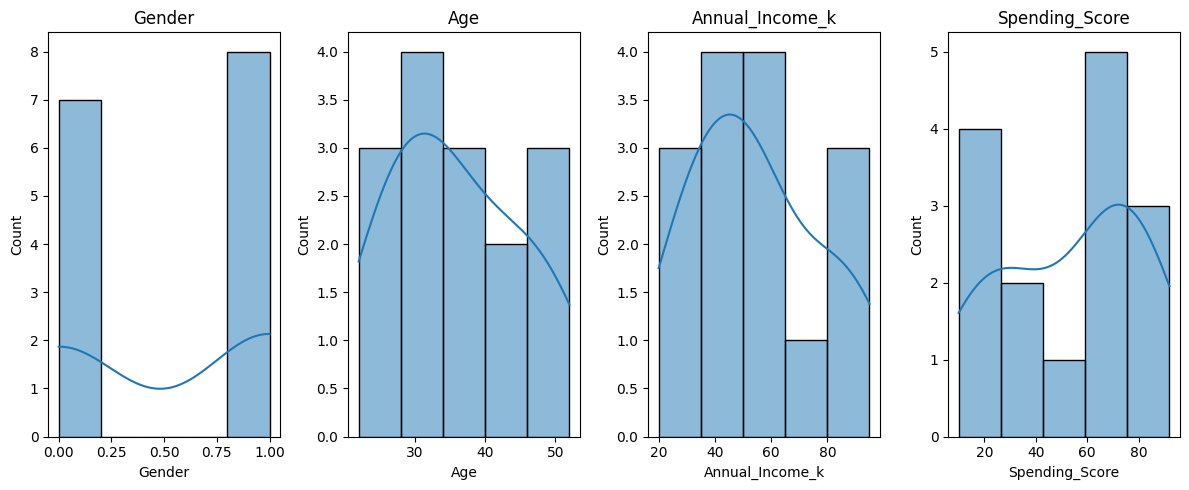

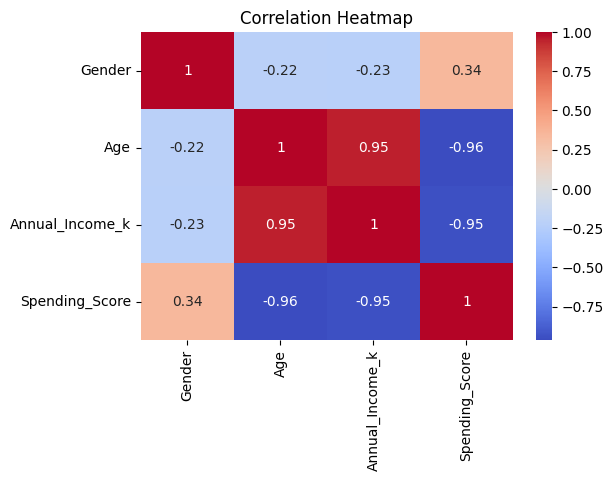

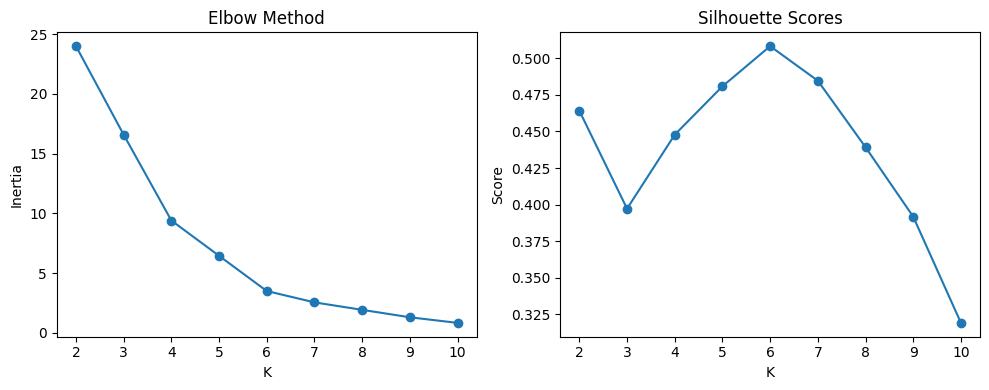


Optimal K selected based on highest Silhouette Score: 6


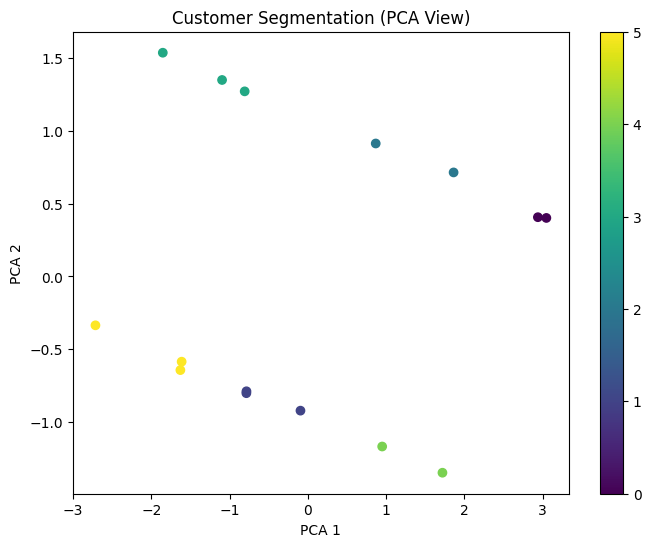


Cluster Mean Values:

         Gender        Age  Annual_Income_k  Spending_Score
Cluster                                                    
0           0.0  51.000000        92.500000       12.500000
1           1.0  34.333333        50.000000       61.000000
2           0.0  40.000000        69.000000       30.000000
3           0.0  27.666667        32.000000       74.333333
4           1.0  45.500000        72.000000       30.000000
5           1.0  25.666667        34.333333       85.000000

Cluster Sizes:

Cluster
3    3
1    3
5    3
4    2
2    2
0    2
Name: count, dtype: int64

Business Insights:

Cluster 0:
High income but low spending → Strong upselling opportunity.

Cluster 1:
High spending customers → Loyalty programs & premium offers.

Cluster 2:
High income but low spending → Strong upselling opportunity.

Cluster 3:
High spending customers → Loyalty programs & premium offers.

Cluster 4:
High income but low spending → Strong upselling opportunity.

Cluster 5:
High sp

In [2]:
"""
Customer Segmentation Mini Project
Using Real Dataset
"""

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


# 2. Load Dataset

file_path = "/mnt/data/customer segmentation.csv"

data = pd.read_csv('customer segmentation.csv')

print("Dataset Loaded Successfully!\n")
print("First 5 Rows:\n")
print(data.head())
print("\nDataset Shape:", data.shape)
print("\nColumns:", data.columns)


# 3. Data Cleaning

print("\nMissing Values:\n")
print(data.isnull().sum())

data.drop_duplicates(inplace=True)

# Encode Gender if exists
if "Gender" in data.columns:
    data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})


# 4. Feature Selection

# Automatically detect common column names
possible_income_cols = [col for col in data.columns if "Income" in col]
possible_spend_cols = [col for col in data.columns if "Spending" in col]

features = ["Age"] + possible_income_cols + possible_spend_cols

if "Gender" in data.columns:
    features = ["Gender"] + features

X = data[features]

print("\nSelected Features:", features)


# 5. Exploratory Data Analysis

print("\nBasic Statistics:\n")
print(X.describe())

plt.figure(figsize=(12,5))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 6. Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 7. Find Optimal Clusters

inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(range(2,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("K")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("\nOptimal K selected based on highest Silhouette Score:", optimal_k)

# 8. Apply K-Means

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data["Cluster"] = clusters

# 9. PCA Visualization

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.title("Customer Segmentation (PCA View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter)
plt.show()

# 10. Cluster Profiling

print("\nCluster Mean Values:\n")
cluster_profile = data.groupby("Cluster")[features].mean()
print(cluster_profile)

print("\nCluster Sizes:\n")
print(data["Cluster"].value_counts())


# 11. Business Insights

print("\nBusiness Insights:")

for cluster in cluster_profile.index:
    print(f"\nCluster {cluster}:")
    
    avg_income = cluster_profile.iloc[cluster][possible_income_cols[0]]
    avg_spend = cluster_profile.iloc[cluster][possible_spend_cols[0]]
    
    if avg_income > data[possible_income_cols[0]].mean() and avg_spend < data[possible_spend_cols[0]].mean():
        print("High income but low spending → Strong upselling opportunity.")
    elif avg_spend > data[possible_spend_cols[0]].mean():
        print("High spending customers → Loyalty programs & premium offers.")
    else:
        print("Moderate/Low engagement → Retention & discount campaigns.")


# 12. Save Results

output_file = "segmented_customers.csv"
data.to_csv(output_file, index=False)

print("\nSegmented dataset saved as:", output_file)
print("\nProject Completed Successfully ")
